# Clustering

- PCA / MDS for visualization
- kmeans for high dimensional data
- silhouett index for cluster quality


#### DBSCAN

In [1]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [ ]:
# Number of samples and features
n_samples = 41
n_features = 1000

# Generate a random matrix with values
data = np.random.rand(n_samples, n_features)

# Generate column names as strings (e.g., Feature1, Feature2, ..., Feature1000)
column_names = [f"Feature{i}" for i in range(1, n_features + 1)]

# Create a DataFrame with the generated data and column names
dataframe = pd.DataFrame(data, columns=column_names)

dataframe.head()  # Display the first few rows of the dataframe



In [ ]:
# Assuming `data` is your 41 x 22000 matrix
# data = ...

# Step 1: Compute the correlation matrix
corr_matrix = np.corrcoef(dataframe)

# Step 2: Perform hierarchical clustering
Z = linkage(corr_matrix, 'average')

# Optional: Plot the dendrogram for visual analysis
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()


In [ ]:

# Step 3: Form clusters - choose the number of clusters based on dendrogram
n_clusters = 10  # Example value, adjust based on your analysis
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='average')
cluster.fit_predict(corr_matrix)

# Step 4: Reduce features by selecting a representative for each cluster
feature_indices = range(data.shape[1])
clustered_features = pd.Series(feature_indices, index=cluster.labels_).groupby(level=0).apply(list)

# Select a representative (e.g., first feature in each cluster)
reduced_features_indices = [features[0] for features in clustered_features]

# Reduced dataset
reduced_data = data[:, reduced_features_indices]

print("Original number of features:", data.shape[1])
print("Reduced number of features:", reduced_data.shape[1])


# PCA + DBSCAN

In [ ]:


# Using the same parameters as the previous example
n_samples = 41
n_features = 1000

# Generate a random matrix with values
data = np.random.rand(n_samples, n_features)

# Standardize the data
data_normalized = StandardScaler().fit_transform(data)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data_pca)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='plasma', marker='o', s=50, alpha=0.7)
plt.title('DBSCAN Clustering (PCA-reduced Data)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()



In [2]:
X = pd.read_csv("/home/t44p/PW_rawdata/tr_gc_mutual/tr_mut_transposed.csv", sep=",")


In [9]:
dessicationX = X.iloc[:20,:]
rehydrationX = X.iloc[20:,:]


In [ ]:
X.T.shape
X.shape

In [16]:

# Standardize the data
data_normalized = StandardScaler().fit_transform(rehydrationX.T)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.09, min_samples=100)
clusters = dbscan.fit_predict(data_pca)




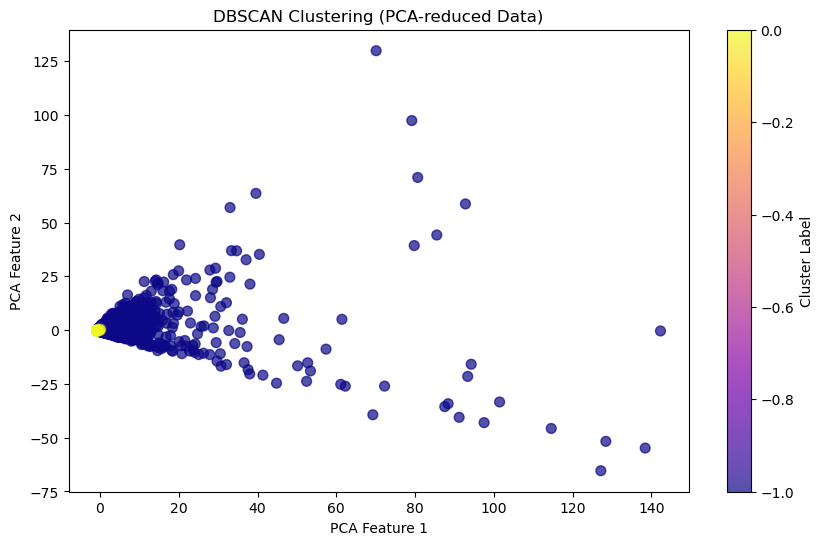

In [20]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='plasma', marker='o', s=50, alpha=0.7)
plt.title('DBSCAN Clustering (PCA-reduced Data)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [18]:
set(clusters)

{-1, 0}

In [14]:
from collections import Counter


In [19]:
Counter(clusters)

Counter({0: 19836, -1: 3729})

In [ ]:
X.columns[np.where(clusters == 7)[0]]

In [21]:

# Standardize the transposed data
data_normalized = StandardScaler().fit_transform(dessicationX.T)

# Apply MDS to the reduced dataset
mds = MDS(n_components=2, random_state=0)
data_mds = mds.fit_transform(data_normalized)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data_mds)



: 

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(data_mds[:, 0], data_mds[:, 1], c=clusters, cmap='plasma', marker='o', s=50, alpha=0.7)
plt.title('DBSCAN Clustering of Features (MDS-reduced, Subset)')
plt.xlabel('MDS Feature 1')
plt.ylabel('MDS Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()